In [1]:
import pandas as pd ;
import matplotlib.pyplot as plt ;
import seaborn as sns ;
import numpy as np ;
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [2]:
dataset=pd.read_csv('./kc_house_data.csv')

In [3]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
bedrooms=dataset['bedrooms']
bathrooms=dataset['bathrooms']
sqft_living=dataset['sqft_living']
sqft_lot=dataset['sqft_lot']
floors=dataset['floors']
waterfront=dataset['waterfront']
view=dataset['view']
condition=dataset['condition']
sqft_about=dataset['sqft_above']
sqft_base=dataset['sqft_basement']
yr_built=dataset['yr_built']
yr_renovated=dataset['yr_renovated']
price=dataset['price']


In [5]:
data={"bedrooms":bedrooms,"bathrooms":bathrooms,"sqft_living":sqft_living,"sqft_lot":sqft_lot,"floors":floors,"waterfront":waterfront,"view":view,"condition":condition,"sqft_above":sqft_about,"sqft_basement":sqft_base,"yr_built":yr_built,"yr_renovated":yr_renovated,"price":price} 

In [6]:
dataset=pd.DataFrame(data,columns=["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","sqft_above","sqft_basement","yr_built","yr_renovated","price"])

In [7]:
dataset.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
0,3,1.00,1180,5650,1.0,0,0,3,1180,0,1955,0,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,2170,400,1951,1991,538000.0
2,2,1.00,770,10000,1.0,0,0,3,770,0,1933,0,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,1050,910,1965,0,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,1680,0,1987,0,510000.0


In [8]:
dataset.to_csv('houseprice.csv',index=False)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
from sklearn.model_selection import train_test_split

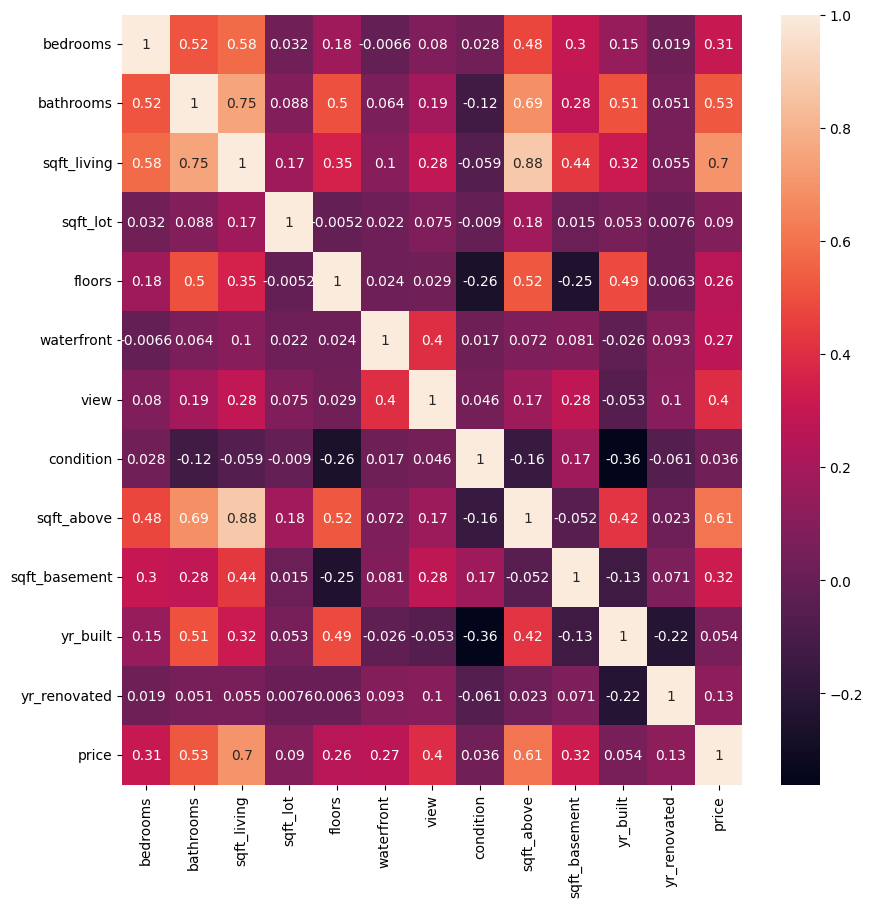

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [12]:
x=dataset.iloc[:,:-1]

In [13]:
y=dataset['price']

In [14]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3,1.00,1180,5650,1.0,0,0,3,1180,0,1955,0
1,3,2.25,2570,7242,2.0,0,0,3,2170,400,1951,1991
2,2,1.00,770,10000,1.0,0,0,3,770,0,1933,0
3,4,3.00,1960,5000,1.0,0,0,5,1050,910,1965,0
4,3,2.00,1680,8080,1.0,0,0,3,1680,0,1987,0


In [15]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [16]:
sc=StandardScaler()

In [17]:
sc.fit(x)

StandardScaler()

In [18]:
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21)

In [20]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [21]:
lr=LinearRegression()

In [22]:
lr.fit(x_train,y_train)


LinearRegression()

In [23]:
lr.score(x_test,y_test)

0.6031243895896883

In [27]:
lr.coef_
mean_squared_error(y_test,lr.predict(x_test))

52819631600.459366

In [28]:
mean_squared_error(y_test,lr.predict(x_test))

mean_absolute_error(y_test,lr.predict(x_test))


154815.85828056862

In [25]:
x.columns


Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

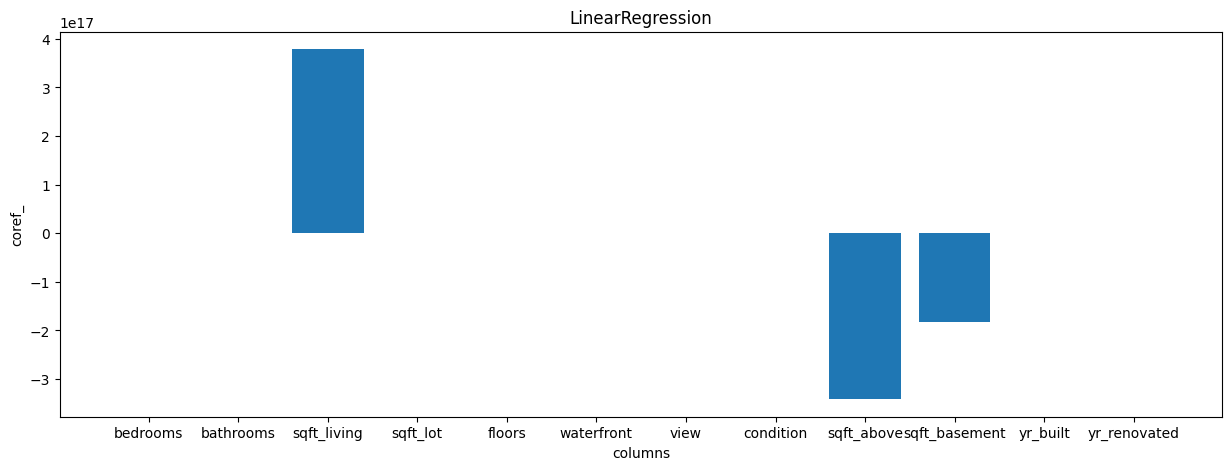

In [26]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,lr.coef_)
plt.title('LinearRegression')
plt.xlabel('columns')
plt.ylabel('coref_')

plt.show()

Lasso

In [31]:
la=Lasso(alpha=10)
la.fit(x_train,y_train)


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.109e+12, tolerance: 2.337e+11
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=10)

In [32]:
la.score(x_test,y_test)

0.6030997163685059

In [33]:
mean_squared_error(y_test,la.predict(x_test))

mean_absolute_error(y_test,la.predict(x_test))

154772.3168583196

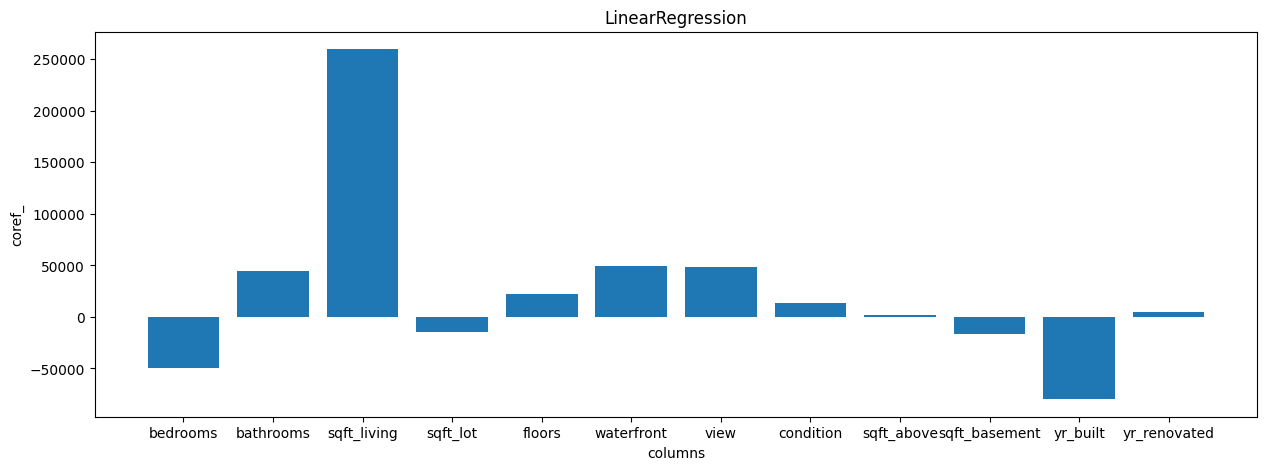

In [34]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,la.coef_)
plt.title('LinearRegression')
plt.xlabel('columns')
plt.ylabel('coref_')

plt.show()

# Ridge

In [37]:
ri= Ridge(alpha=10)


In [38]:
ri.fit(x_train, y_train)

Ridge(alpha=10)

In [39]:
ri.score(x_test, y_test)

0.6030847046941267

In [43]:
mean_squared_error(y_test,ri.predict(x_test))

mean_absolute_error(y_test,ri.predict(x_test))
np.sqrt(mean_squared_error(y_test,ri.predict(x_test)))

229836.70988089437

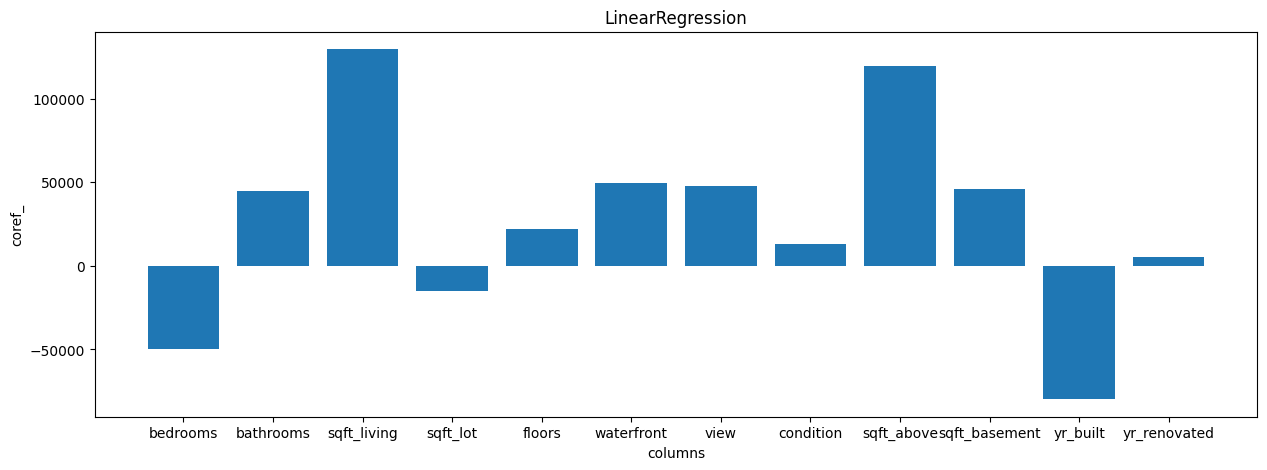

In [41]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,ri.coef_)
plt.title('LinearRegression')
plt.xlabel('columns')
plt.ylabel('coref_')

plt.show()

In [44]:
df=pd.DataFrame({"col_name":x.columns,"LinearRegression":lr.coef_,"Lasso":la.coef_,"Ridge":ri.coef_})

In [ ]:
df